导入需要的库

In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [4]:
x1 = np.array(x)

将向量转化为图里的点，求数据间的相似度。

In [5]:
#计算距离平方的矩阵，稍后使用返回的数据计算相似度的矩阵，使用欧氏距离
def fill_dist_mat(data):
    dist_mat = np.zeros((data.shape[0],data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            dist_mat[i][j] = np.square(cal_dist(data,i,j))
    return dist_mat
def cal_dist(data,i,j):
    dist = np.sqrt(np.square(data[i][0]-data[j][0])+np.square(data[i][1]-data[j][1])+np.square(data[i][2]-data[j][2])+np.square(data[i][3]-data[j][3]))
    return dist

In [6]:
#得到相似度矩阵(W),可选是否归一化处理，阈值可自定，默认0.777
def cal_weight_mat(dist_mat,gamma = 1/(np.sqrt(2)),zer01 = True,threshold = 0.777):
    weight_mat = np.zeros((dist_mat.shape[0],dist_mat.shape[0]))
    for i in range(dist_mat.shape[0]):
        for j in range(dist_mat.shape[1]):
            weight_mat[i][j] = (np.exp(-1*(dist_mat[i][j])/(2*(np.square(gamma)))))
    if(zer01 == False):
        return weight_mat
    else:
        for i in range(weight_mat.shape[0]):
            for j in range(weight_mat.shape[1]):
                if(weight_mat[i][j]>threshold):
                    weight_mat[i][j] = 1
                else:
                    weight_mat[i][j] = 0
    return weight_mat

In [7]:
dist_mat = fill_dist_mat(x1)
W = cal_weight_mat(dist_mat,zer01 = False)
temp_W = cal_weight_mat(dist_mat,zer01 = True)

In [8]:
#计算度矩阵（D），之后开始可视化相关工作,传入二值化的邻接矩阵
def cal_Delta(weight_mat):
    Delta = np.zeros((weight_mat.shape[0],weight_mat.shape[0]))
    for i in range(weight_mat.shape[0]):
        temp = 0
        for j in range(weight_mat.shape[1]):
            temp += weight_mat[i][j]
            Delta[i][i] = temp
    return Delta

In [9]:
D = cal_Delta(temp_W)

In [10]:
#打印带权邻接矩阵
W

array([[1.00000000e+00, 7.48263568e-01, 7.71051586e-01, ...,
        2.30082059e-09, 4.03840951e-10, 3.59908895e-08],
       [7.48263568e-01, 1.00000000e+00, 9.13931185e-01, ...,
        1.62136087e-09, 2.15082380e-10, 3.22418674e-08],
       [7.71051586e-01, 9.13931185e-01, 1.00000000e+00, ...,
        3.65410404e-10, 6.16221335e-11, 9.42405852e-09],
       ...,
       [2.30082059e-09, 1.62136087e-09, 3.65410404e-10, ...,
        1.00000000e+00, 6.83861409e-01, 6.63650250e-01],
       [4.03840951e-10, 2.15082380e-10, 6.16221335e-11, ...,
        6.83861409e-01, 1.00000000e+00, 5.54327285e-01],
       [3.59908895e-08, 3.22418674e-08, 9.42405852e-09, ...,
        6.63650250e-01, 5.54327285e-01, 1.00000000e+00]])

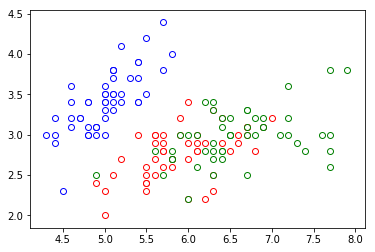

In [23]:
#将鸢尾花数据集画成图
import networkx as nx
import matplotlib.pyplot as plt 

for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(x[i,0], x[i,1],c="w", edgecolors='b')
    elif y[i] == 1:
        plt.scatter(x[i,0], x[i,1], c="w", edgecolors='r')
    else:
        plt.scatter(x[i,0], x[i,1], c="w", edgecolors='g')

In [32]:
#谱聚类
from sklearn.cluster import KMeans
def fit(W,D):
    L = W - D                    #拉普拉斯矩阵
    w,v = np.linalg.eig(L)
    v = np.transpose(v)          #谱聚类是将特征向量组成的矩阵按行输入，所以转置
    #Kmeans得到簇
    km = KMeans(n_clusters=3,random_state=2)
    y = km.fit(v).labels_
    return y

In [33]:
#正确率
from sklearn.metrics import accuracy_score
pred_y = fit(W,D)
acc = accuracy_score(y,pred_y)
print(acc)

0.36


分析：矩阵中向量的预处理方法存在问题，没有尝试更多的方法。